# Setup

In [ ]:
!pip install crcmod
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Import data

In [ ]:
#for getting with evenergy163.appspot.com folder
#!gsutil -m -o 'GSUtil:parallel_composite_upload_threshold_1M''GSUtil:sliced_object_download_max_components=8' cp -r gs://evenergy163.appspot.com/ .
!gsutil -m -o 'GSUtil:parallel_composite_upload_threshold_1M''GSUtil:sliced_object_download_max_components=8' cp -r gs://evenergy163.appspot.com/data/** .

Copying gs://evenergy163.appspot.com/data/HS861 2010-.xlsx...
Copying gs://evenergy163.appspot.com/data/annual_generation_state.xlsx...
Copying gs://evenergy163.appspot.com/data/HS861M 2010-.xlsx...
Copying gs://evenergy163.appspot.com/data/evwatts.public.dictionary.txt...
Copying gs://evenergy163.appspot.com/data/evwatts.public.evse.csv...
Copying gs://evenergy163.appspot.com/data/evwatts.public.connector.csv...
Copying gs://evenergy163.appspot.com/data/evwatts.public.session.csv...
Copying gs://evenergy163.appspot.com/data/evwatts.public.vehicles.csv...
Copying gs://evenergy163.appspot.com/data/evwatts.public.vehicletrips.csv...
Copying gs://evenergy163.appspot.com/data/evwatts.public.vehiclesessions.csv...
Copying gs://evenergy163.appspot.com/data/generation_monthly.xlsx...


# Visualization anad analysis


## consumption and generation of energy


In [ ]:
df_usage = pd.read_excel("HS861 2010-.xlsx", header=2)
df_usage = df_usage[['Year', 'STATE', 'Thousand Dollars.4', 'Megawatthours.4', 'Cents/kWh.4']]
df_usage = df_usage[df_usage['STATE'] == 'CA']
df_usage['Megawatthours.4'] = pd.to_numeric(df_usage['Megawatthours.4'], errors='coerce')

#fig = plt.figure(figsize=(10, 8))
#sns.lineplot(x=df_usage['Year'],
#             y=df_usage['Megawatthours.4'],
#             hue=df_usage['STATE'],
#             )

usage_stats = {
    'Mean': df_usage['Megawatthours.4'].mean(),
    'Median': df_usage['Megawatthours.4'].median(),
    'Standard Deviation': df_usage['Megawatthours.4'].std()
}
print("Electricity Usage Statistics:", usage_stats)

Electricity Usage Statistics: {'Mean': np.float64(255256427.92857143), 'Median': 257057286.0, 'Standard Deviation': 6679464.517647878}


This graph represents the total electric generation and consumption trends in California over time, spanning from 2010 to 2023. The blue line represents electricity generation, while the red line represents electricity consumption. The y-axis measures electricity in megawatt-hours (MWh), and the x-axis represents the years.

The red line (consumption) shows a gradual decline over the years, especially after 2015.
There are fluctuations, but the overall trend suggests that total electricity consumption in California has decreased.
The sharp decline in the final years could indicate changes in industrial demand, energy efficiency measures, or shifts in economic activity.

The blue line (generation) remains relatively low compared to consumption.
The trend initially declines but later rebounds around 2021–2023, indicating an increase in electricity generation capacity.
The generation data shows more year-to-year fluctuations compared to the steady decline in consumption.

Since the generation line is always below the consumption line, it indicates that California consistently imports electricity from other states or relies on alternative energy sources.
This gap suggests that California is not energy self-sufficient, which could impact energy prices and sustainability.

/usr/local/lib/python3.11/dist-packages/openpyxl/packaging/custom.py:213: UserWarning: Unknown type for {A44787D4-0540-4523-9961-78E4036D8C6D}
  warn(f"Unknown type for {prop.name}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62282 entries, 0 to 62281
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YEAR                        62282 non-null  int64  
 1   STATE                       62282 non-null  object 
 2   TYPE OF PRODUCER            62282 non-null  object 
 3   ENERGY SOURCE               62282 non-null  object 
 4   GENERATION (Megawatthours)  62282 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.4+ MB


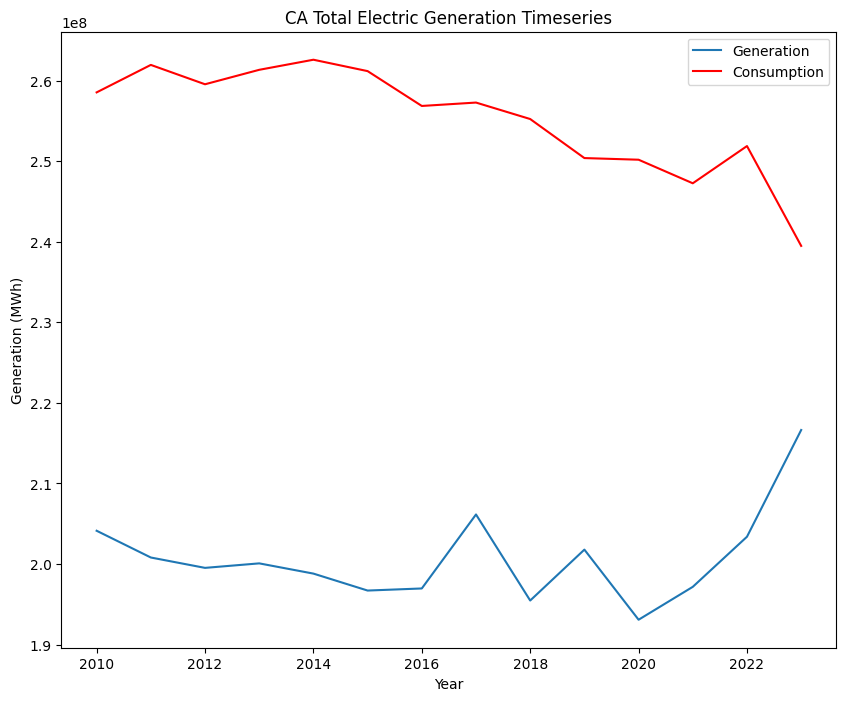

In [ ]:
df = pd.read_excel("annual_generation_state.xlsx", header=1)
df.info()
df
test = df[(df['STATE'] == 'CA') & (df['ENERGY SOURCE'] == 'Total') & (df['YEAR'] >= 2010) & (df['TYPE OF PRODUCER'] == 'Total Electric Power Industry')]
#test = test.groupby(['YEAR'])['GENERATION (Megawatthours)'].sum().reset_index()
test
fig = plt.figure(figsize=(10, 8))
plt.plot(test['YEAR'], test['GENERATION (Megawatthours)'], label='Generation')
plt.plot(df_usage['Year'], df_usage['Megawatthours.4'], color='red', label='Consumption')
plt.title('CA Total Electric Generation Timeseries')
plt.xlabel('Year')
plt.ylabel('Generation (MWh)')
plt.legend()

This graph represents electricity consumption (measured in megawatt-hours) in California over time, spanning from 2010 to 2023. The y-axis represents electricity consumption, while the x-axis represents years.

From 2010 to approximately 2014, electricity consumption in California experienced a gradual increase, reaching a peak around 2014–2015.
This increase could be attributed to population growth, economic expansion, and increased energy demand from industries and households.

After peaking, the trend reversed, and consumption began to gradually decline.
The decline could be due to several factors, including:
Energy efficiency improvements in homes and businesses.
Increased adoption of renewable energy sources like solar panels reducing grid dependency.
Regulatory policies encouraging conservation and demand response programs.

The most striking feature of the graph is the sharp decline in electricity consumption after 2022.
This could be due to:
Policy changes affecting energy use.
A major economic downturn or industrial shift leading to reduced demand.
Improved efficiency technologies significantly reducing consumption.

In [ ]:
generation_stats = {
    'Mean': test['GENERATION (Megawatthours)'].mean(),
    'Median': test['GENERATION (Megawatthours)'].median(),
    'Standard Deviation': test['GENERATION (Megawatthours)'].std()
}
print("Electricity Generation Statistics:", generation_stats)

Electricity Generation Statistics: {'Mean': np.float64(200761319.3642857), 'Median': 199797840.81, 'Standard Deviation': 5795653.620321197}


## EV dataset analysis

## where is the most used charging areas

In [ ]:
session_data = pd.read_csv('evwatts.public.session.csv')
evse_data = pd.read_csv('evwatts.public.evse.csv')

In [ ]:
evse_data.groupby('evse_id')['num_ports'].sum()

,num_ports
evse_id,
0,2
1,2
2,2
3,2
4,2
...,...
41696,2
41697,1
41699,1


In [ ]:
#getting the most used EV service equipment
top10_evse = session_data.groupby('evse_id').size().sort_values(ascending=False).head(11) #11 because evse_id 23333 is missing for some reason.
top10_evse = top10_evse.reset_index()
top10_evse.columns = ['evse_id', 'use_count']
#top10_evse

In [ ]:
top_evse = evse_data[evse_data['evse_id'].isin(top10_evse['evse_id'])]
top_evse = top_evse.merge(top10_evse, on='evse_id', how='left')
top_evse = top_evse.sort_values(by='use_count', ascending=False).reset_index(drop=True)
top_evse

,evse_id,metro_area,land_use,region,num_ports,charge_level,venue,pricing,use_count
0,18103,Undesignated,Metro Area,Pacific,1,DCFC,Corridor,Free,10066
1,18197,"Los Angeles-Long Beach-Anaheim, CA Metro Area",Metro Area,Pacific,1,DCFC,Undesignated,Free,10036
2,18186,"Los Angeles-Long Beach-Anaheim, CA Metro Area",Metro Area,Pacific,1,DCFC,Undesignated,Free,9605
3,18094,Undesignated,Metro Area,Pacific,1,DCFC,Corridor,Paid,9534
4,4569,"Burlington-South Burlington, VT Metro Area",Metro Area,New England,2,L2,Retail,Free,9345
5,1329,"Seattle-Tacoma-Bellevue, WA Metro Area",Metro Area,Pacific,1,DCFC,Undesignated,Paid,9158
6,1737,"Phoenix-Mesa-Chandler, AZ Metro Area",Metro Area,Mountain,1,DCFC,Undesignated,Free,9135
7,1735,"Phoenix-Mesa-Chandler, AZ Metro Area",Metro Area,Mountain,1,DCFC,Undesignated,Free,9112
8,18135,Undesignated,Metro Area,Pacific,1,DCFC,Undesignated,Free,9099
9,5230,"Phoenix-Mesa-Chandler, AZ Metro Area",Metro Area,Mountain,1,DCFC,Undesignated,Free,8871


In [ ]:
session_filter = session_data[['evse_id', 'charge_duration', 'energy_kwh']]
#session_filter.groupby('evse_id').sum().sort_values(by='energy_kwh', ascending=False)
session_data#.groupby('evse_id')['energy_kwh'].sum().sort_values(ascending=False)
session_data['year'] = session_data['start_datetime'].str[:4]

In [ ]:
top_evse_per_year = session_data.groupby(['year', 'evse_id'])['energy_kwh'].sum().reset_index()\
  .sort_values(['year', 'energy_kwh'], ascending=[True, False])\
  .groupby('year').head(5)
#top_evse_per_year

In [ ]:
top_evse_per_year.merge(evse_data[['evse_id', 'metro_area', 'region']],on='evse_id', how='left')

,year,evse_id,energy_kwh,metro_area,region
0,2019,1084,31740.094021,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
1,2019,1081,31086.495941,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
2,2019,1080,31039.455941,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
3,2019,1079,30153.045901,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
4,2019,18281,27738.666994,Undesignated,Pacific
5,2020,1081,124786.342239,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
6,2020,1852,115938.693992,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
7,2020,1080,93179.767052,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
8,2020,1850,88809.571992,"New York-Newark-Jersey City, NY-NJ-PA Metro Area",Middle Atlantic
9,2020,18220,88233.583055,Undesignated,Pacific


It seems that most of the top used charging locations has free pricing, perhaps it only applies to this set of data collection. Also, the it seems that this data contains a lot of pacific region stations. The ranking as follows for United States is CA, WA, AZ. It also seem that they are all in some metro area. However, when it comes to the place with the most energy used, it was east coast around 2019 followed by west coast, then finally shifting to the highest in Arizona, california's neighboring state. evse_id 18000 appears to be in california LA, but marked as undesignated for privacy. However, perhaps it's because there are more charging stations on the west coast, that allows it to not show up on the most energy usage since, it could be possibly divided by a larger amount of charging stations.

## energy usage prediction on larger scale with synthetic data

In [ ]:
ev_data = pd.read_csv("evwatts.public.vehiclesessions.csv")
ev_data

,id,vehicle_id,start_datetime,stop_datetime,duration,energy_kwh,soc_start,soc_stop,rucc_id,flag_id
0,19904,702,2021-03-09,NaN,1.956111,12.720231,90.0,90.0,1.0,0
1,19905,703,2021-03-09,NaN,6.950833,169.101094,55.0,90.0,1.0,0
2,19906,697,2021-03-09,NaN,3.346111,150.250031,60.0,90.0,1.0,16
3,19907,699,2021-03-09,NaN,0.433333,24.737317,85.0,90.0,1.0,16
4,19908,700,2021-03-09,NaN,2.033056,96.214313,30.0,50.0,1.0,16
...,...,...,...,...,...,...,...,...,...,...
182866,695138,291,2023-10-31 07:50:00,2023-10-31 08:00:00,0.138889,0.679000,0.0,5.0,1.0,512
182867,695139,949,2023-10-12 07:00:00,2023-10-12 08:30:00,1.547778,1.656000,90.0,100.0,1.0,0
182868,695140,949,2023-11-14 14:20:00,2023-11-14 14:30:00,0.192778,0.643770,0.0,5.0,5.0,512
182869,695141,949,2023-11-22 14:00:00,2023-11-22 14:10:00,0.112778,0.552000,NaN,NaN,1.0,512


## Combining energy with EV dataset

## How much energy generated and consumed, and future requirements of EV growth, a misrepresentation.

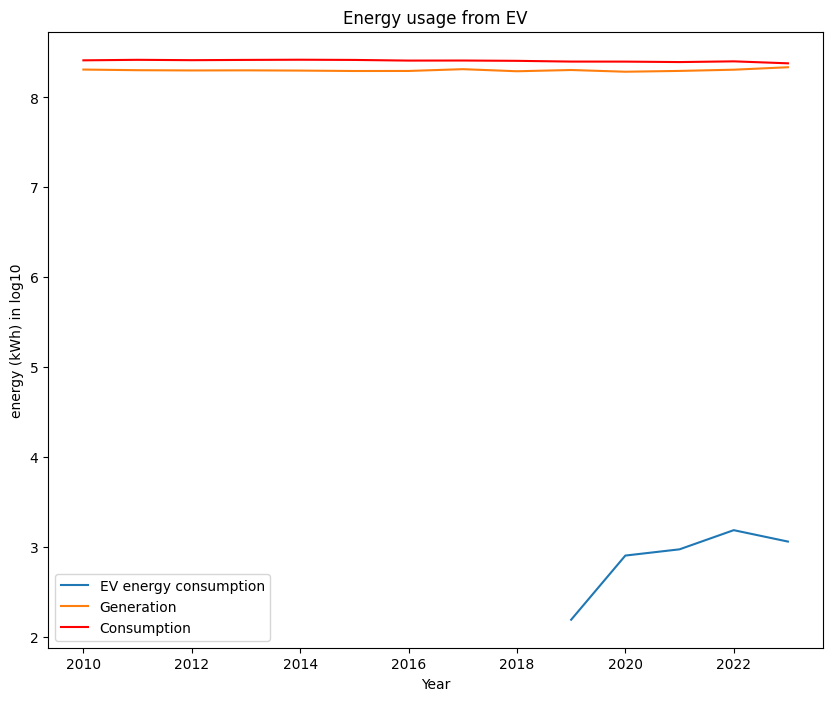

In [ ]:
#ev_data = pd.read_csv("evwatts.public.vehiclesessions.csv")
ev_data['charge_year'] = pd.to_numeric(ev_data['start_datetime'].str[:4])

vehicle_data = pd.read_csv('evwatts.public.vehicles.csv')
id_to_state = dict(zip(vehicle_data['id'], vehicle_data['state']))

ev_data['state'] = ev_data['vehicle_id'].map(id_to_state)

grouped_ev_data = ev_data.groupby(['charge_year', 'state'])['energy_kwh'].sum().reset_index()
grouped_ev_data['energy_mwh'] = grouped_ev_data['energy_kwh'] / 1000

ca_grouped_data = grouped_ev_data[grouped_ev_data['state'] == 'California'].reset_index()

ca_grouped_data = grouped_ev_data[grouped_ev_data['state'] == 'California']
fig = plt.figure(figsize=(10,8))
sns.lineplot(x=ca_grouped_data['charge_year'],
             y=np.log10(ca_grouped_data['energy_mwh']),
             label='EV energy consumption'
            )
plt.plot(test['YEAR'], np.log10(test['GENERATION (Megawatthours)']), label='Generation')
plt.plot(df_usage['Year'], np.log10(df_usage['Megawatthours.4']), color='red', label='Consumption')

plt.title("Energy usage from EV")
plt.xlabel("Year")
plt.ylabel("energy (kWh) in log10")
plt.legend()

In [ ]:
ev_data['energy_mwh'] = ev_data['energy_kwh'] / 1000
#ev_data.groupby(['state', 'charge_year'])['energy_mwh'].sum().reset_index().sort_values(by=['state','energy_mwh'], ascending=False)

In [ ]:
session_data.head(5)

,session_id,evse_id,connector_id,start_datetime,end_datetime,total_duration,charge_duration,energy_kwh,start_soc,end_soc,flag_id,year
0,11562,5,5,2020-03-01 09:37:44,2020-03-01 11:14:59,1.621389,1.615556,6.170,NaN,NaN,0,2020
1,11563,116,116,2020-03-01 10:02:24,2020-03-01 11:08:14,1.096944,1.089722,5.212,NaN,NaN,0,2020
2,11564,72,72,2020-03-01 10:06:08,2020-03-01 11:08:10,1.033611,1.024722,3.392,NaN,NaN,0,2020
3,11565,1,1,2020-03-01 10:01:12,2020-03-01 11:07:09,1.099722,1.076111,6.521,NaN,NaN,0,2020
4,11566,0,138,2020-02-29 19:09:03,2020-03-01 10:47:16,15.636667,12.658889,80.527,NaN,NaN,0,2020


In [ ]:
evse_data.head(1)

,evse_id,metro_area,land_use,region,num_ports,charge_level,venue,pricing
0,6034,Undesignated,Metro Area,Mountain,1,DCFC,Corridor,Paid


# Another investigation: comparing the usage of energy by charging stations in a region, to investigate growth of EVs

In [ ]:
evse_avg = session_data.groupby(['evse_id','year'])['energy_kwh'].sum().reset_index()
#evse_avg = evse_avg.merge(evse_data[['evse_id', 'metro_area', 'region']], on='evse_id', how='left')
evse_avg['year'] = evse_avg['year'].astype(int)

#need to find the avg for each year to find trend
#the mean wouldn't really work here since the mean of all sessions is very small, so a summation will be used.

<ipython-input-21-12b509198c3b>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='EVSE ID', bbox_to_anchor=(1.05, 1), loc='upper left')


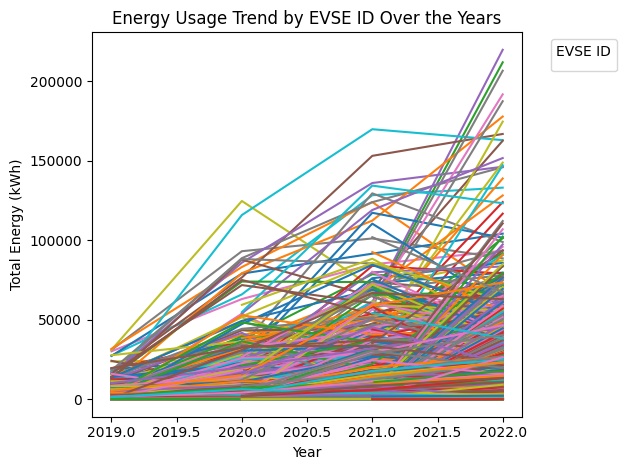

In [ ]:
pivot_trend = evse_avg.pivot(index='year', columns='evse_id', values='energy_kwh')

plt.plot(pivot_trend)
plt.title('Energy Usage Trend by EVSE ID Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Energy (kWh)')
plt.legend(title='EVSE ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

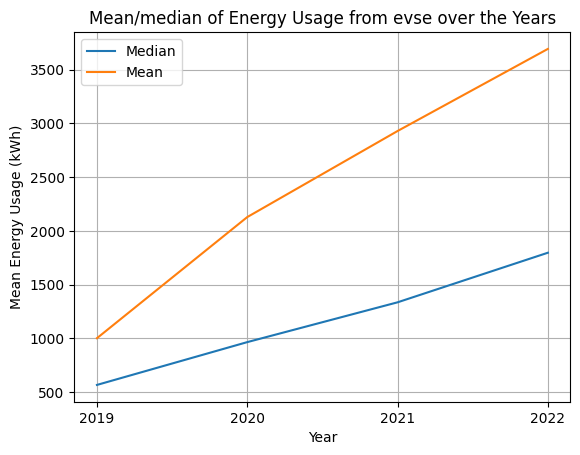

In [ ]:
mean_energy_usage = evse_avg.groupby('year')['energy_kwh'].mean().reset_index()
#mean_energy_usage

median_energy_usage = evse_avg.groupby('year')['energy_kwh'].median().reset_index()
#median_energy_usage

plt.plot(median_energy_usage['year'], median_energy_usage['energy_kwh'], label='Median')
plt.plot(mean_energy_usage['year'], mean_energy_usage['energy_kwh'], label='Mean')
plt.title('Mean/median of Energy Usage from evse over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Energy Usage (kWh)')
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.grid(True)

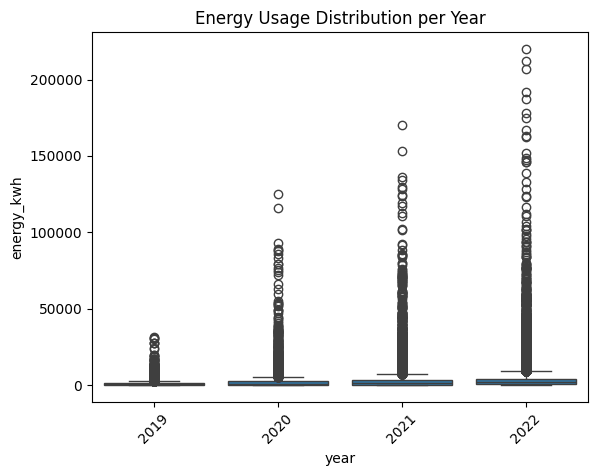

In [ ]:
sns.boxplot(data=evse_avg, x='year', y='energy_kwh')
plt.title("Energy Usage Distribution per Year")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

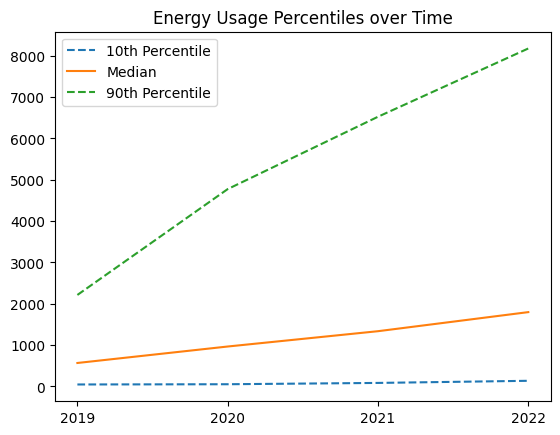

In [ ]:
#observing 10th, 50th, and 90th percentile's changes over time.
quantiles = evse_avg.groupby('year')['energy_kwh'].quantile([0.1, 0.5, 0.9]).unstack()
plt.plot(quantiles.index, quantiles[0.1], linestyle='--', label='10th Percentile')
plt.plot(quantiles.index, quantiles[0.5], label='Median')
plt.plot(quantiles.index, quantiles[0.9], linestyle='--', label='90th Percentile')
plt.legend()
plt.title("Energy Usage Percentiles over Time")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()


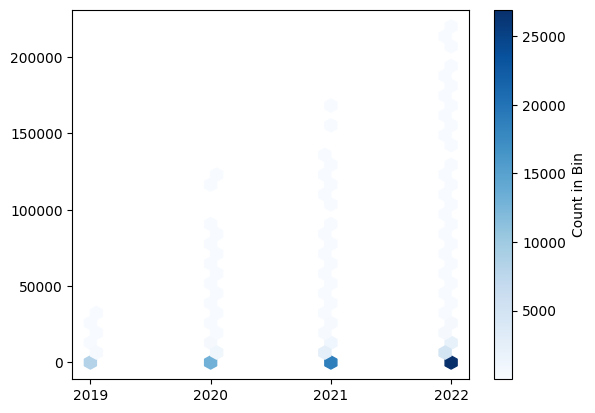

In [ ]:
df=evse_avg.copy()
df['year'] = df['year'].astype(int)
#sns.lineplot(data=quantiles, palette='tab10', linewidth=2)

plt.hexbin(df['year'], df['energy_kwh'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in Bin')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

Text(0.5, 1.0, 'Energy Usage Percentiles over Time')

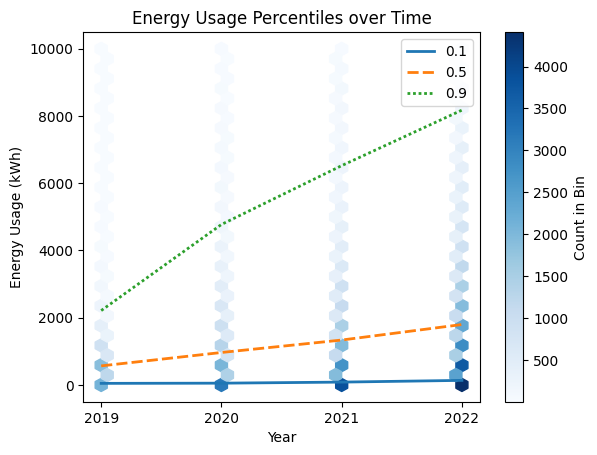

In [ ]:
filtered_df = df[df['energy_kwh'] <= 10000]
sns.lineplot(data=quantiles, palette='tab10', linewidth=2)
plt.hexbin(filtered_df['year'], filtered_df['energy_kwh'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in Bin')
plt.ylabel('Energy Usage (kWh)')
plt.xlabel('Year')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.title('Energy Usage Percentiles over Time')

## Analysis:
In this plot above, with a hexbin, and filtering of energy_kwh to be below 20,000 so that we can see the lines more clearly. We can see that the majority is apporximately within the 10th percentile, and below the 50th percentile. While those above the 50th percentile have higher energy usage. It seems that there are some stations that have lower charging sessions, but longer durations or more usage.

In [ ]:
vehicle_data.groupby('state').size()

,0
state,
California,102
Colorado,267
Georgia,72
Massachusetts,44
New York,72
Ohio,203
Other,229
Texas,37
Washington,107


Apparently the majority of the vehicles were in colardo, ohio, and other or probably not in the states.

In [ ]:
colorado_ev_data = ev_data[ev_data['state'] == 'Colorado']
colorado_ev_data

#merged_colorado_data = pd.merge(colorado_ev_data, session_data, on='session_id', how=)

,id,vehicle_id,start_datetime,stop_datetime,duration,energy_kwh,soc_start,soc_stop,rucc_id,flag_id,charge_year,state,energy_mwh
43431,553260,243,2019-08-31 21:20:00,2019-08-31 21:40:00,0.327778,0.77440,10.0,20.0,1.0,0,2019,Colorado,0.000774
43432,553261,243,2019-08-31 21:50:00,2019-08-31 22:10:00,0.288611,0.77440,NaN,NaN,1.0,0,2019,Colorado,0.000774
43433,553262,259,2019-09-03 10:20:00,2019-09-03 10:40:00,0.227500,0.98280,NaN,NaN,1.0,0,2019,Colorado,0.000983
43434,553263,259,2019-09-03 10:40:00,2019-09-03 10:50:00,0.138889,1.03740,20.0,25.0,1.0,0,2019,Colorado,0.001037
43435,553264,259,2019-09-03 11:30:00,2019-09-03 12:10:00,0.683333,1.03740,15.0,25.0,1.0,0,2019,Colorado,0.001037
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182866,695138,291,2023-10-31 07:50:00,2023-10-31 08:00:00,0.138889,0.67900,0.0,5.0,1.0,512,2023,Colorado,0.000679
182867,695139,949,2023-10-12 07:00:00,2023-10-12 08:30:00,1.547778,1.65600,90.0,100.0,1.0,0,2023,Colorado,0.001656
182868,695140,949,2023-11-14 14:20:00,2023-11-14 14:30:00,0.192778,0.64377,0.0,5.0,5.0,512,2023,Colorado,0.000644
182869,695141,949,2023-11-22 14:00:00,2023-11-22 14:10:00,0.112778,0.55200,NaN,NaN,1.0,512,2023,Colorado,0.000552


In [ ]:
session_data['year'] = session_data['year'].astype(int)
session_data

,session_id,evse_id,connector_id,start_datetime,end_datetime,total_duration,charge_duration,energy_kwh,start_soc,end_soc,flag_id,year
0,11562,5,5,2020-03-01 09:37:44,2020-03-01 11:14:59,1.621389,1.615556,6.170000,NaN,NaN,0,2020
1,11563,116,116,2020-03-01 10:02:24,2020-03-01 11:08:14,1.096944,1.089722,5.212000,NaN,NaN,0,2020
2,11564,72,72,2020-03-01 10:06:08,2020-03-01 11:08:10,1.033611,1.024722,3.392000,NaN,NaN,0,2020
3,11565,1,1,2020-03-01 10:01:12,2020-03-01 11:07:09,1.099722,1.076111,6.521000,NaN,NaN,0,2020
4,11566,0,138,2020-02-29 19:09:03,2020-03-01 10:47:16,15.636667,12.658889,80.527000,NaN,NaN,0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
13937230,14715979,27099,36881,2022-12-28 19:51:30,2022-12-29 00:30:53,4.656389,4.655556,45.023398,NaN,NaN,0,2022
13937231,14715980,27107,36889,2022-10-17 09:32:10,2022-10-17 09:37:22,0.086667,0.710000,8.217523,NaN,NaN,0,2022
13937232,14715981,27107,36889,2022-10-22 16:38:44,2022-10-22 22:21:32,5.713333,3.056389,10.849586,NaN,NaN,0,2022
13937233,14715982,27107,36889,2022-10-29 15:29:15,2022-10-29 15:54:17,0.417222,0.416667,2.743180,NaN,NaN,0,2022


In [ ]:
ev_data

,id,vehicle_id,start_datetime,stop_datetime,duration,energy_kwh,soc_start,soc_stop,rucc_id,flag_id,charge_year,state,energy_mwh
0,19904,702,2021-03-09,NaN,1.956111,12.720231,90.0,90.0,1.0,0,2021,California,0.012720
1,19905,703,2021-03-09,NaN,6.950833,169.101094,55.0,90.0,1.0,0,2021,California,0.169101
2,19906,697,2021-03-09,NaN,3.346111,150.250031,60.0,90.0,1.0,16,2021,California,0.150250
3,19907,699,2021-03-09,NaN,0.433333,24.737317,85.0,90.0,1.0,16,2021,California,0.024737
4,19908,700,2021-03-09,NaN,2.033056,96.214313,30.0,50.0,1.0,16,2021,California,0.096214
...,...,...,...,...,...,...,...,...,...,...,...,...,...
182866,695138,291,2023-10-31 07:50:00,2023-10-31 08:00:00,0.138889,0.679000,0.0,5.0,1.0,512,2023,Colorado,0.000679
182867,695139,949,2023-10-12 07:00:00,2023-10-12 08:30:00,1.547778,1.656000,90.0,100.0,1.0,0,2023,Colorado,0.001656
182868,695140,949,2023-11-14 14:20:00,2023-11-14 14:30:00,0.192778,0.643770,0.0,5.0,5.0,512,2023,Colorado,0.000644
182869,695141,949,2023-11-22 14:00:00,2023-11-22 14:10:00,0.112778,0.552000,NaN,NaN,1.0,512,2023,Colorado,0.000552


Apparently i couldn't find matching data from vehiclesession and session data, perhaps they are different, and that the combined table according to the dictionary is not the given here.

# some problems we run into #
we decide to go with the larger dataset, then we might lose access to knowing which states it's from and have to use the regions such as pacific which encompass the entire west coast. like california, washignton, oregon,  combined etc.

If we go with the smaller dataset, which is from vehicle session, then we could use the states, but dont have access or way to connect to the evse data.

In [ ]:
evse_data.groupby('region').size()

,0
region,
East North Central,4711
East South Central,1366
Middle Atlantic,6264
Mountain,3512
New England,4943
Pacific,6084
South Atlantic,5774
West North Central,1960
West South Central,2312


In [ ]:
evse_data[(~evse_data['metro_area'].str.contains('Undesignated')) & (evse_data['region'] == 'Pacific')]

,evse_id,metro_area,land_use,region,num_ports,charge_level,venue,pricing
84,1758,"Seattle-Tacoma-Bellevue, WA Metro Area",Metro Area,Pacific,1,DCFC,Undesignated,Paid
86,1855,"Portland-Vancouver-Hillsboro, OR-WA Metro Area",Metro Area,Pacific,1,DCFC,Undesignated,Free
87,1861,"Portland-Vancouver-Hillsboro, OR-WA Metro Area",Metro Area,Pacific,1,DCFC,Undesignated,Free
88,1868,"Portland-Vancouver-Hillsboro, OR-WA Metro Area",Metro Area,Pacific,1,DCFC,Undesignated,Free
90,1748,"Seattle-Tacoma-Bellevue, WA Metro Area",Metro Area,Pacific,1,DCFC,Undesignated,Paid
...,...,...,...,...,...,...,...,...
36873,16070,"Seattle-Tacoma-Bellevue, WA Metro Area",Metro Area,Pacific,1,L2,Transit Facility,Undesignated
36874,16012,"Seattle-Tacoma-Bellevue, WA Metro Area",Metro Area,Pacific,1,L2,Transit Facility,Paid
36875,16166,"Seattle-Tacoma-Bellevue, WA Metro Area",Metro Area,Pacific,1,L2,Transit Facility,Paid
36876,17292,"Seattle-Tacoma-Bellevue, WA Metro Area",Metro Area,Pacific,1,L2,Transit Facility,Paid


In [ ]:
evse_data[(evse_data['region'] == 'Pacific')]['metro_area'].unique()

array(['Seattle-Tacoma-Bellevue, WA Metro Area', 'Undesignated',
       'Portland-Vancouver-Hillsboro, OR-WA Metro Area',
       'Los Angeles-Long Beach-Anaheim, CA Metro Area',
       'Salem, OR Metro Area'], dtype=object)

It looks like out of the 6084 stations in the pacific, only 4140 stations are in metro areas, and the remaining are marked as undesignated which could mean they are in rural locations or marked for privacy

In [ ]:
session_region = session_data.merge(evse_data[['evse_id', 'region']], on='evse_id', how='left')

In [ ]:
session_region

,session_id,evse_id,connector_id,start_datetime,end_datetime,total_duration,charge_duration,energy_kwh,start_soc,end_soc,flag_id,year,region
0,11562,5,5,2020-03-01 09:37:44,2020-03-01 11:14:59,1.621389,1.615556,6.170000,NaN,NaN,0,2020,Middle Atlantic
1,11563,116,116,2020-03-01 10:02:24,2020-03-01 11:08:14,1.096944,1.089722,5.212000,NaN,NaN,0,2020,Middle Atlantic
2,11564,72,72,2020-03-01 10:06:08,2020-03-01 11:08:10,1.033611,1.024722,3.392000,NaN,NaN,0,2020,Middle Atlantic
3,11565,1,1,2020-03-01 10:01:12,2020-03-01 11:07:09,1.099722,1.076111,6.521000,NaN,NaN,0,2020,Middle Atlantic
4,11566,0,138,2020-02-29 19:09:03,2020-03-01 10:47:16,15.636667,12.658889,80.527000,NaN,NaN,0,2020,Middle Atlantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13937230,14715979,27099,36881,2022-12-28 19:51:30,2022-12-29 00:30:53,4.656389,4.655556,45.023398,NaN,NaN,0,2022,West South Central
13937231,14715980,27107,36889,2022-10-17 09:32:10,2022-10-17 09:37:22,0.086667,0.710000,8.217523,NaN,NaN,0,2022,West South Central
13937232,14715981,27107,36889,2022-10-22 16:38:44,2022-10-22 22:21:32,5.713333,3.056389,10.849586,NaN,NaN,0,2022,West South Central
13937233,14715982,27107,36889,2022-10-29 15:29:15,2022-10-29 15:54:17,0.417222,0.416667,2.743180,NaN,NaN,0,2022,West South Central


# Visualization: EV growth in the pacific region

since we were able to find something meaningful such as the amount of energy used by a charging stations in a region, we then compare and contrast with other regions like the pacific.

In [ ]:
new_session_data = session_region[session_region['region'] == 'Pacific']
new_session_data
pacific_evse_avg = new_session_data.groupby(['evse_id','year'])['energy_kwh'].sum().reset_index()
pacific_evse_avg['year'] = pacific_evse_avg['year'].astype(int)

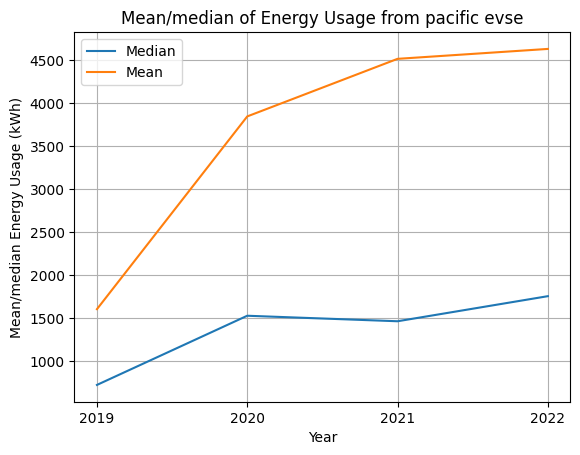

In [ ]:
p_mean_energy_usage = pacific_evse_avg.groupby('year')['energy_kwh'].mean().reset_index()
#mean_energy_usage

p_median_energy_usage = pacific_evse_avg.groupby('year')['energy_kwh'].median().reset_index()
#median_energy_usage

plt.plot(p_median_energy_usage['year'], p_median_energy_usage['energy_kwh'], label='Median')
plt.plot(p_mean_energy_usage['year'], p_mean_energy_usage['energy_kwh'], label='Mean')
plt.title('Mean/median of Energy Usage from pacific evse')
plt.xlabel('Year')
plt.ylabel('Mean/median Energy Usage (kWh)')
plt.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.grid(True)

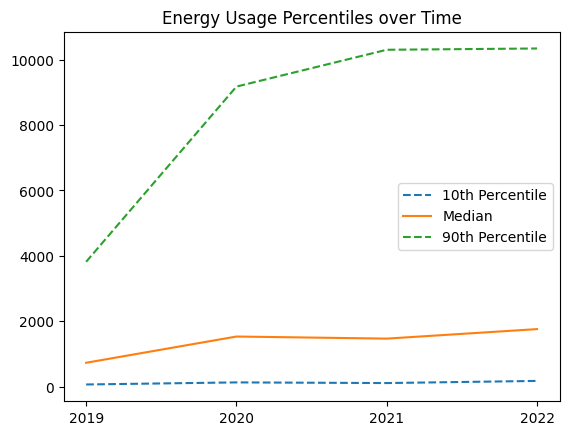

In [ ]:
pacific_quantiles = pacific_evse_avg.groupby('year')['energy_kwh'].quantile([0.1, 0.5, 0.9]).unstack()
plt.plot(pacific_quantiles.index, pacific_quantiles[0.1], linestyle='--', label='10th Percentile')
plt.plot(pacific_quantiles.index, pacific_quantiles[0.5], label='Median')
plt.plot(pacific_quantiles.index, pacific_quantiles[0.9], linestyle='--', label='90th Percentile')
plt.legend()
plt.title("Energy Usage Percentiles over Time")
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.show()

Text(0.5, 1.0, 'Energy Usage Percentiles over Time in pacific')

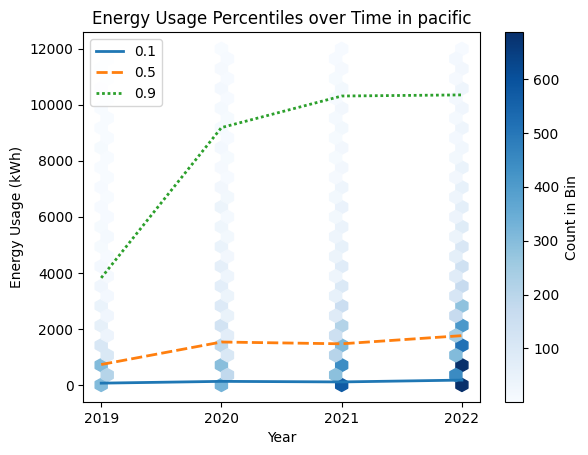

In [ ]:
df = pacific_evse_avg.copy()
filtered_df = df[df['energy_kwh'] <= 12000]
sns.lineplot(data=pacific_quantiles, palette='tab10', linewidth=2)
plt.hexbin(filtered_df['year'], filtered_df['energy_kwh'], gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Count in Bin')
plt.ylabel('Energy Usage (kWh)')
plt.xlabel('Year')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.title('Energy Usage Percentiles over Time in pacific')

#Analyzing trends of ev growth amonst regions

Here we analyze the trends of energy usage against all regions

In [ ]:
evse_data

,evse_id,metro_area,land_use,region,num_ports,charge_level,venue,pricing
0,6034,Undesignated,Metro Area,Mountain,1,DCFC,Corridor,Paid
1,6065,Undesignated,Metro Area,Mountain,1,DCFC,Corridor,Paid
2,6100,"Phoenix-Mesa-Chandler, AZ Metro Area",Metro Area,Mountain,1,DCFC,Undesignated,Free
3,6155,Undesignated,Metro Area,Mountain,1,DCFC,Corridor,Paid
4,1315,"Denver-Aurora-Lakewood, CO Metro Area",Metro Area,Mountain,1,DCFC,Corridor,Free
...,...,...,...,...,...,...,...,...
36921,17417,Undesignated,Metro Area,West South Central,2,L2,Transit Facility,Paid
36922,17602,Undesignated,Metro Area,West South Central,2,L2,Transit Facility,Paid
36923,17562,Undesignated,Metro Area,West South Central,2,L2,Transit Facility,Paid
36924,23604,Undesignated,Metro Area,West South Central,2,L2,Transit Facility,Paid


In [ ]:

pacific_evse_avg = new_session_data.groupby(['evse_id','year'])['energy_kwh'].sum().reset_index()
pacific_evse_avg['year'] = pacific_evse_avg['year'].astype(int)

In [ ]:
session_region.region.unique()

array(['Middle Atlantic', 'West North Central', 'West South Central',
       'Mountain', 'Pacific', 'South Atlantic', 'East North Central',
       'New England', 'East South Central', nan], dtype=object)

In [ ]:
M_A_evse = session_region[session_region['region'] == 'Middle Atlantic'].groupby(['evse_id','year'])['energy_kwh'].sum().reset_index()
W_N_C_evse = session_region[session_region['region'] == 'West North Central'].groupby(['evse_id','year'])['energy_kwh'].sum().reset_index()
W_S_C_evse = session_region[session_region['region'] == 'West South Central'].groupby(['evse_id','year'])['energy_kwh'].sum().reset_index()
mountain_evse = session_region[session_region['region'] == 'Mountain'].groupby(['evse_id','year'])['energy_kwh'].sum().reset_index()
S_A_evse = session_region[session_region['region'] == 'South Atlantic'].groupby(['evse_id','year'])['energy_kwh'].sum().reset_index()
E_N_C_evse = session_region[session_region['region'] == 'East North Central'].groupby(['evse_id','year'])['energy_kwh'].sum().reset_index()
N_E = session_region[session_region['region'] == 'New England'].groupby(['evse_id','year'])['energy_kwh'].sum().reset_index()
E_S_C_evse = session_region[session_region['region'] == 'East South Central'].groupby(['evse_id','year'])['energy_kwh'].sum().reset_index()


In [ ]:
p_median_energy_usage = pacific_evse_avg.groupby('year')['energy_kwh'].median().reset_index()

In [ ]:
regions = ['Middle Atlantic', 'West North Central', 'West South Central',
       'Mountain', 'Pacific', 'South Atlantic', 'East North Central',
       'New England', 'East South Central']

session_region

,session_id,evse_id,connector_id,start_datetime,end_datetime,total_duration,charge_duration,energy_kwh,start_soc,end_soc,flag_id,year,region
0,11562,5,5,2020-03-01 09:37:44,2020-03-01 11:14:59,1.621389,1.615556,6.170000,NaN,NaN,0,2020,Middle Atlantic
1,11563,116,116,2020-03-01 10:02:24,2020-03-01 11:08:14,1.096944,1.089722,5.212000,NaN,NaN,0,2020,Middle Atlantic
2,11564,72,72,2020-03-01 10:06:08,2020-03-01 11:08:10,1.033611,1.024722,3.392000,NaN,NaN,0,2020,Middle Atlantic
3,11565,1,1,2020-03-01 10:01:12,2020-03-01 11:07:09,1.099722,1.076111,6.521000,NaN,NaN,0,2020,Middle Atlantic
4,11566,0,138,2020-02-29 19:09:03,2020-03-01 10:47:16,15.636667,12.658889,80.527000,NaN,NaN,0,2020,Middle Atlantic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13937230,14715979,27099,36881,2022-12-28 19:51:30,2022-12-29 00:30:53,4.656389,4.655556,45.023398,NaN,NaN,0,2022,West South Central
13937231,14715980,27107,36889,2022-10-17 09:32:10,2022-10-17 09:37:22,0.086667,0.710000,8.217523,NaN,NaN,0,2022,West South Central
13937232,14715981,27107,36889,2022-10-22 16:38:44,2022-10-22 22:21:32,5.713333,3.056389,10.849586,NaN,NaN,0,2022,West South Central
13937233,14715982,27107,36889,2022-10-29 15:29:15,2022-10-29 15:54:17,0.417222,0.416667,2.743180,NaN,NaN,0,2022,West South Central


## Visualization: EV growth trends from all regions

In [ ]:
median_energy_by_region_year = session_region.groupby(['evse_id', 'region', 'year'])['energy_kwh'].sum().reset_index()
median_energy_by_region_year

,evse_id,region,year,energy_kwh
0,0,Middle Atlantic,2019,4663.015
1,0,Middle Atlantic,2020,16985.684
2,0,Middle Atlantic,2021,6449.112
3,0,Middle Atlantic,2022,23708.473
4,1,Middle Atlantic,2019,4215.051
...,...,...,...,...
78780,41695,Mountain,2022,2969.903
78781,41696,Mountain,2022,192.926
78782,41699,Middle Atlantic,2022,19.996
78783,41700,Middle Atlantic,2022,410.839


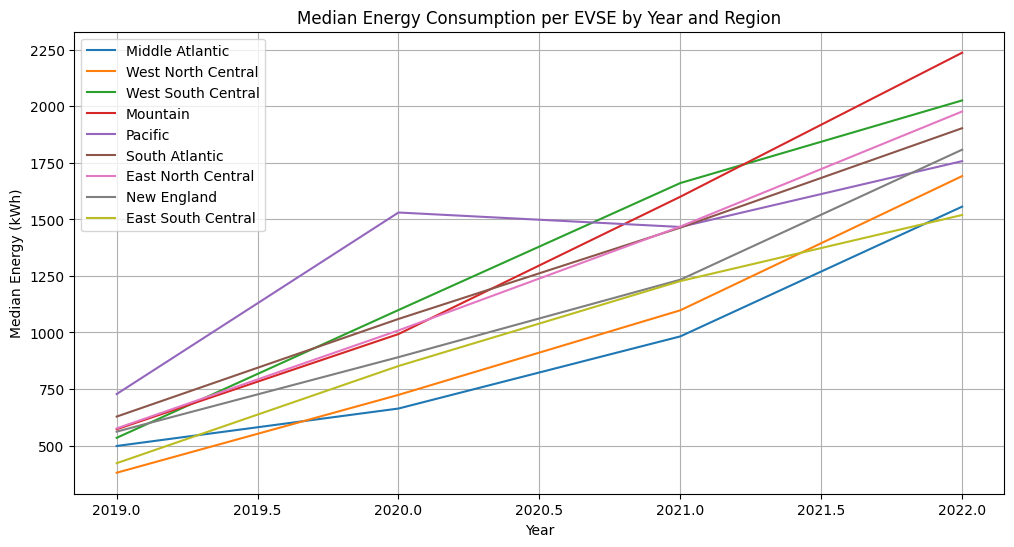

In [ ]:
plt.figure(figsize=(12, 6))
for region in median_energy_by_region_year['region'].unique():
    region_data = median_energy_by_region_year[median_energy_by_region_year['region'] == region]
    region_data = region_data.groupby('year')['energy_kwh'].median().reset_index()
    plt.plot(region_data['year'], region_data['energy_kwh'], label=region)

plt.xlabel('Year')
plt.ylabel('Median Energy (kWh)')
plt.title('Median Energy Consumption per EVSE by Year and Region')
plt.legend()
plt.grid(True)
plt.show()

## Analysis:
In this visualization, where we did an aggregation by evse_id, year, and region to compute the summation of each evse_id energy usage by year, and then take the median of, we find that the the trend of energy consumption from each station is trending up. Which suggest that the growth of EV is increase either from increase usage or more people having EVs. Since most of the energy at the beginning of 2019 was around 500-700, and at 2022 it was around 1500 to 2200, we can say that over this 3 year span, energy consumption has trippled, for every region.

#Linear Regression and Correlation stuff



In [ ]:
session_data

,session_id,evse_id,connector_id,start_datetime,end_datetime,total_duration,charge_duration,energy_kwh,start_soc,end_soc,flag_id,year
0,11562,5,5,2020-03-01 09:37:44,2020-03-01 11:14:59,1.621389,1.615556,6.170000,NaN,NaN,0,2020
1,11563,116,116,2020-03-01 10:02:24,2020-03-01 11:08:14,1.096944,1.089722,5.212000,NaN,NaN,0,2020
2,11564,72,72,2020-03-01 10:06:08,2020-03-01 11:08:10,1.033611,1.024722,3.392000,NaN,NaN,0,2020
3,11565,1,1,2020-03-01 10:01:12,2020-03-01 11:07:09,1.099722,1.076111,6.521000,NaN,NaN,0,2020
4,11566,0,138,2020-02-29 19:09:03,2020-03-01 10:47:16,15.636667,12.658889,80.527000,NaN,NaN,0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
13937230,14715979,27099,36881,2022-12-28 19:51:30,2022-12-29 00:30:53,4.656389,4.655556,45.023398,NaN,NaN,0,2022
13937231,14715980,27107,36889,2022-10-17 09:32:10,2022-10-17 09:37:22,0.086667,0.710000,8.217523,NaN,NaN,0,2022
13937232,14715981,27107,36889,2022-10-22 16:38:44,2022-10-22 22:21:32,5.713333,3.056389,10.849586,NaN,NaN,0,2022
13937233,14715982,27107,36889,2022-10-29 15:29:15,2022-10-29 15:54:17,0.417222,0.416667,2.743180,NaN,NaN,0,2022


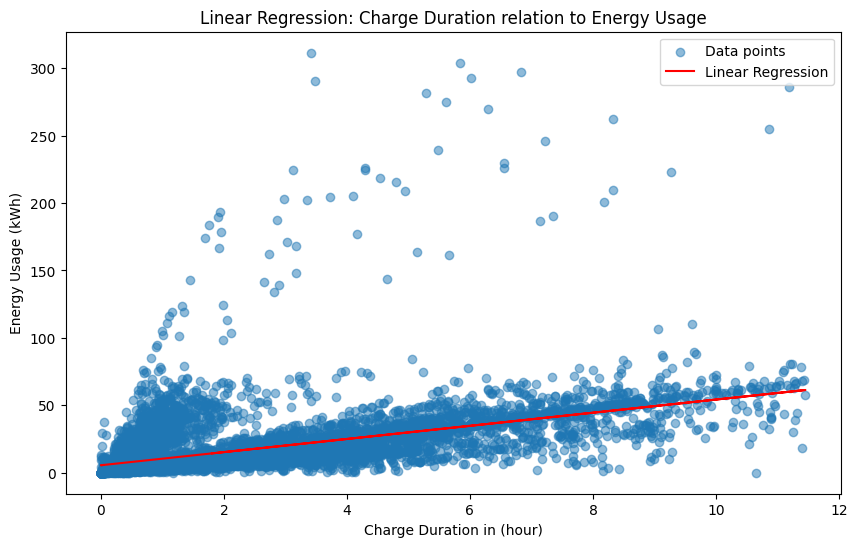

                            OLS Regression Results                            
Dep. Variable:             energy_kwh   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     3453.
Date:                Sat, 12 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:57:10   Log-Likelihood:                -41770.
No. Observations:                9690   AIC:                         8.354e+04
Df Residuals:                    9688   BIC:                         8.356e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               5.5452      0.269     

In [ ]:
# prompt: generate a plot for linear regression, to see if charge_duration (must be positive, and remove outliers) is related to energy usage, also make sure that n/a values are replaced with the median, make sure to use a reasonable sample size to prevent high ram usage.
# line is red

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'session_data' is already defined from the previous code

# Sample a subset of the data (adjust the sample size as needed)
sampled_session_data = session_data.sample(n=10000, random_state=42)  # Example: sample 10,000 rows


# Remove rows with NA values
sampled_session_data = sampled_session_data.dropna(subset=['charge_duration', 'energy_kwh'])

# Replace remaining NA values in 'charge_duration' with the median
sampled_session_data['charge_duration'] = sampled_session_data['charge_duration'].fillna(sampled_session_data['charge_duration'].median())

# Remove outliers (optional, but recommended)
# Define a reasonable range for 'charge_duration' (positive values)
sampled_session_data = sampled_session_data[sampled_session_data['charge_duration'] > 0]
# Filter out potential outliers based on your domain knowledge or IQR
# For example, remove rows where 'charge_duration' is above the 99th percentile
upper_bound = sampled_session_data['charge_duration'].quantile(0.99)
sampled_session_data = sampled_session_data[sampled_session_data['charge_duration'] <= upper_bound]


# Perform linear regression (assuming you want to use statsmodels)
import statsmodels.api as sm

X = sampled_session_data['charge_duration']
y = sampled_session_data['energy_kwh']
X = sm.add_constant(X) # adding a constant
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(X['charge_duration'], y, alpha=0.5, label='Data points')
plt.plot(X['charge_duration'], predictions, color='red', label='Linear Regression')
plt.xlabel('Charge Duration in (hour)')
plt.ylabel('Energy Usage (kWh)')
plt.title('Linear Regression: Charge Duration relation to Energy Usage')
plt.legend()
plt.show()

# Print the regression results
print(model.summary())


## Summary of plot:

This is a linear regression plot, showing the correlation between charge duration in hours and energy usage, its uses only a sample of 10,000 to prevent the notebook from crashing during run.

There are more points around the lower numbers, suggesting that most charge duration is around 2 hours. We can see that energy usage is widespread, with outliers having up to 300kwh usage.

The line in the plot for the linear regression, suggest a positive correlation that as charge duration increase, so does energy usage. But the data spread around the line shows there is significant variance indicating the model may not perfectly capture the relationship. The r square was only 0.263 or 26.3%, meaning that the remaining 73.7% of variance was not captured by the model due to other factors. So this suggest that the relationship between charge duration and energy usage is weak.



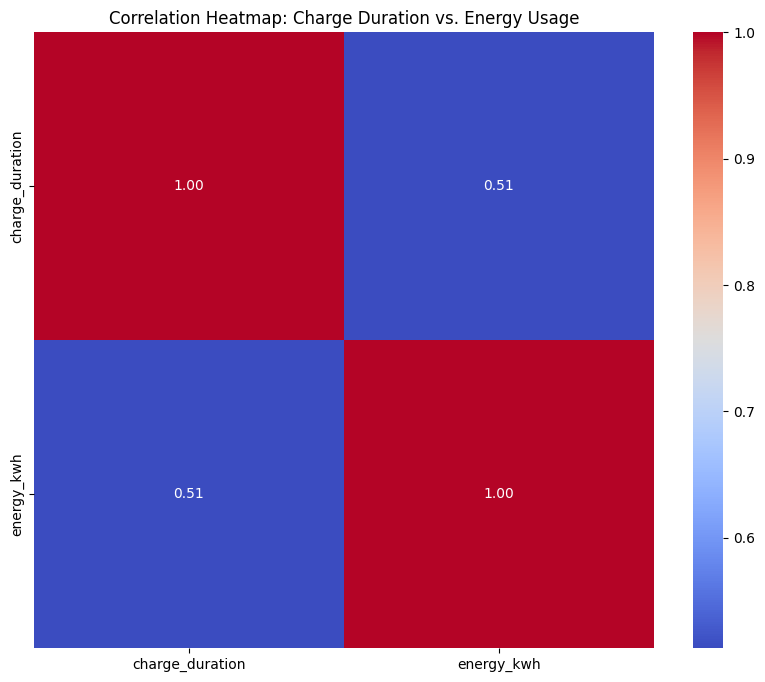

In [ ]:
# prompt: use heatmap to show correlation between charge duration and energy usage

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'sampled_session_data' is already defined and processed as in the previous code

plt.figure(figsize=(10, 8))
sns.heatmap(sampled_session_data[['charge_duration', 'energy_kwh']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Charge Duration vs. Energy Usage')
plt.show()


#summary:
The correlation matrix shows a correlation coefficient of 0.51, suggesting moderate positive correlation.

#EV Sales trend vs EV energy usage trend

When looking at our Ev energy usage, we see a linear growth trend in consumption of energy in kwh. However when looking at EV sales data publically available on IEA website, it shows an exponential growth trend.

Since our dataset for energy only consist of public charging station data, it leads us to assume that it may not capture private or home charging, or that perhaps the EV battery has enough capacity for long ranges before requiring to charge again. Coming to a conclusion that this hypothesis is the reason why our dataset only shows a linear growth.

Since we do not have datasets for EV battery capacity and improvements overtime, nor access to private home charging data, this assumption is the best we can give.